# Logistic Regression With More Training Examples Using Sklearn

In our previous notebook, Logistic Regression with balanced class weight did the best using TFIDF with ngram(1, 3) with 4000 features

In this notebook we will increase the number of examples to see if we can improve our model performance using sklearn's Logistic Regression

# Conclusion

* Increasing the number of samples did improve the model performance. 
* There was about a 5% improvement with 500k samples compared to 50k samples
* There was a steeper increase been 50k to 100k samples than 100k to 500k samples suggesting that there might be a plateau where increasing our sample size may not help our model improve
* Training beyond 500k samples errored out on my 2018 Mac Mini with 32 GB of ram probably because it is trying to hold everything in RAM - will have to use Pyspark to train larger sample size

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import importlib
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import util.model_util as mu
import util.report_util as ru
import util.plot_util as pu

%matplotlib inline
sns.set(font_scale=2)

CONFIG_DIR = "../config"
CONFIG_FILE = f'{CONFIG_DIR}/2019-11-run_classifiers-lrb.csv'
REPORT_DIR = "../reports"
REPORT_FILE_PREV = f'{REPORT_DIR}/2019-11-01-run_classifiers-50k-report.csv'
REPORT_FILE = f'{REPORT_DIR}/2019-11-run_classifiers-lrb-report.csv'

/Users/vinceluk/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/Users/vinceluk/anaconda3/envs/capstone/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/vinceluk/anaconda3/envs/capstone/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future versi

## Running Our Model

Jupyter notebook was not stable for me when running models for some reason. So I created a program that takes in configuration files and runs all models serially.

To run this again, execute the following command in the tools directory:

```
python run_classifiers.py ../config/2019-11-run_classifiers-lrb.csv
```

In [2]:
config = pd.read_csv(CONFIG_FILE)
config

,data_dir,data_file,class_column,dtype,drop_columns,model_name,max_iter,sampling,status,status_date,message
0,../dataset/feature_files,review_body-tfidf-df_none-ngram13-99567-4000-n...,star_rating,NaN,"helpful_votes, total_votes, helpful_product",LRB,100,NaN,success,2019-11-05 13:47:44,NaN
1,../dataset/feature_files,review_body-tfidf-df_none-ngram13-199134-4000-...,star_rating,NaN,"helpful_votes, total_votes, helpful_product",LRB,100,NaN,success,2019-11-05 13:59:09,NaN
2,../dataset/feature_files,review_body-tfidf-df_none-ngram13-497835-4000-...,star_rating,NaN,"helpful_votes, total_votes, helpful_product",LRB,100,NaN,success,2019-11-20 02:23:22,NaN
3,../dataset/feature_files,review_body-tfidf-df_none-ngram13-995687-4000-...,star_rating,NaN,"helpful_votes, total_votes, helpful_product",LRB,100,NaN,failed,2019-11-20 02:44:00,"Input contains NaN, infinity or a value too la..."
4,../dataset/feature_files,review_body-tfidf-df_none-ngram13-1999999-4000...,star_rating,NaN,"helpful_votes, total_votes, helpful_product",LRB,100,NaN,failed,2019-11-20 02:44:03,"With n_samples=0, test_size=0.25 and train_siz..."


Load our Report

In [3]:
# best model from our previous report
report = ru.load_best_from_report(REPORT_FILE_PREV)
# add our current report
report = report.append(ru.load_report(REPORT_FILE)).astype({"sample_size": np.int32})

# Results

Training Time:
* training time significantly increases between 200k to 500k samples as you see a much steeper slope for training time between 200k and 500k compared to 100k to 200k samples

Model Performance:
* increasing sample sized did improve our over all score
* slope of improvement is decreasing as we add more samples suggesting there may be a plateau for our model when we increase our sample size
* using sample size > 500k actually errored out on my computer


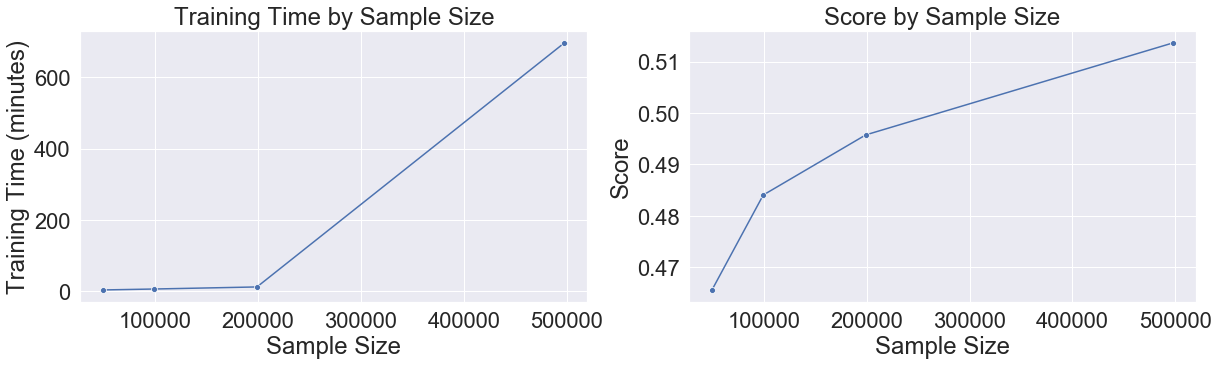

In [4]:
report.total_time_min = report.train_time_min + report.predict_time_min
report = report.sort_values("sample_size")

f, a = plt.subplots(1, 2, figsize=(20, 5))
# sns.lineplot(data = report, x = "sample_size", y = "total_time_min", sort=False, marker="o", ax=a[0])
# _ = plt.title("Training Time by Sample Size")
# _ = plt.xlabel("Sample Size")
# _ = plt.ylabel("Training Time (minutes)")

# Total Training Time
sns.lineplot(data = report, x = "sample_size", y = "total_time_min", sort=False, marker="o", ax=a[0])
_ = a[0].set_title("Training Time by Sample Size")
_ = a[0].set_xlabel("Sample Size")
_ = a[0].set_ylabel("Training Time (minutes)")

# Score
sns.lineplot(data = report, x = "sample_size", y = "eval_metric", sort=False, marker="o", ax=a[1])
_ = a[1].set_title("Score by Sample Size")
_ = a[1].set_xlabel("Sample Size")
_ = a[1].set_ylabel("Score")

In [9]:
report[report.sample_size == 497835][["description", "model_file"]]

,description,model_file
2,review_body-tfidf-df_none-ngram13-497835-4000-...,../models/review_body-tfidf-df_none-ngram13-49...
3,review_body-tfidf-df_none-ngram13-497835-4000-...,../models/review_body-tfidf-df_none-ngram13-49...


In [8]:
report.columns

Index(['1_f1-score', '1_precision', '1_recall', '1_support', '2_f1-score',
       '2_precision', '2_recall', '2_support', '3_f1-score', '3_precision',
       '3_recall', '3_support', '4_f1-score', '4_precision', '4_recall',
       '4_support', '5_f1-score', '5_precision', '5_recall', '5_support',
       'accuracy', 'confusion_matrix', 'description', 'file',
       'file_load_time_min', 'macro avg_f1-score', 'macro avg_precision',
       'macro avg_recall', 'macro avg_support', 'model_file', 'model_name',
       'model_save_time_min', 'param', 'predict_time_min', 'smote_time_min',
       'status', 'status_date', 'test_examples', 'test_features',
       'total_time_min', 'train_examples', 'train_features', 'train_time_min',
       'weighted avg_f1-score', 'weighted avg_precision',
       'weighted avg_recall', 'weighted avg_support', 'config_file',
       'eval_metric', 'feature_column', 'feature_engineering', 'config_df',
       'config_ngram', 'sample_size', 'feature_size', 'has_lda', 